In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 5000, 'display.max_columns', 500, 'max_colwidth', None)
import warnings
warnings.filterwarnings("ignore")

plt.rcParams['font.family'] = 'Malgun Gothic'

kospi  = pd.read_csv('../input/kospi.csv')
nasdaq = pd.read_csv('../input/nasdaq.csv')
sp500  = pd.read_csv('../input/sp500.csv')
date_dtm = pd.read_csv('./date_dtm.csv')

In [3]:
kospi['vol'] = np.log(kospi['Close']).diff().rolling(window=20, center=False).std() * (252 ** 0.5)
# *200
kospi['std'] = kospi['Close'].rolling(window=20).std(ddof=0)
# *1.4

nasdaq['vol'] = np.log(nasdaq['Close']).diff().rolling(window=30, center=False).std() * (252 ** 0.5)*5
nasdaq['std'] = nasdaq['Close'].rolling(window=20).std(ddof=0)

sp500['vol'] = np.log(sp500['Close']).diff().rolling(window=30, center=False).std() * (252 ** 0.5) * 50
sp500['std'] = sp500['Close'].rolling(window=20).std(ddof=0) / 4

kospi = kospi.merge(date_dtm, left_on='Date', right_on='date')
nasdaq = nasdaq.merge(date_dtm, left_on='Date', right_on='date')
sp500  = sp500.merge(date_dtm, left_on='Date', right_on='date')

In [3]:
kospi.head()

,Date,Close,Open,High,Low,Volume,Change,vol,std,date,index,page,패스,피해,외인,수혜,불가피,상향,고지,부양책,감리,우려,긴급,셧다운,신호,공개,팬데믹,확진,등록,모집,팔자,워스트,대체,사상,탈출,가능,메타,달성,경신,어닝,위험,탈환,경색,안정,모멘텀,추진,남북,순이익,매각,충격,리비아,최고점,사드,초대형,횡보,공략,강세,인기,촉각,관건,수급,타결,이벤트,이탈,과세,상승세,감산,구제,과잉,고용,우수,맥스,백신,상환,당선,동양종금,실망,완화,원전,협력,접종,방어,베팅,마이너스,변동성,폭탄,치료,공매도,매입,제한,긍정,제자리,부각,상승,사기,부채,협상,상회,근접,분쟁,여파,민감,선호,개장,신청,상보,급등,가소,파월,악재,상한,대출,후퇴,발동,개시,알리바바,지지,발전,긴축,대지진,최악,안전,화이자,유동성,임박,와락,투자자,반락,약화,가치,승인,확정,발굴,추락,현금,뒷걸음,가능성,위기,지속,인하,기념,매수,실패,안도,급락,부담,단독,돌파,하향,개발,대비,그리스,도달,러브콜,헝다,친환경,둔화,불황,불확실,오름,폭발,반전,고조,개선,부양,흐름,외국인,호재,주의,카드,도약,손실,협약,결합,공모,반발,금리인하,역대,보유,적자,개편,수요,취임,심리,주춤,출시,외국,급증,원대,긴장,부족,북핵,부진,대안,역배,등락,통화,활발,서브프라임,거품,깜짝,유로존,투자,보합,반등,과열,이슈,환매,진출,강등,배당,출발,대상,최고,그린,공시,발목,심사,우투,하락,안심,이익,불안,중단,낙관,바이,개최,북한,위안,대박,침체,랠리,코로나,낙폭,폭등,소송,금지,훈풍,최저,대우조선,유상증자,공세,소비,폐렴,신용등급,눈앞,급감,해소,시그널,김정일,제외,리먼,감전,분할,출범,선도,개편안,성공,대표,화제,지연,인플레,리스크,합의,통과,일시,쇼크,소재,디디,성장,증가,우한,활성화,원화,능가,편입,여전,이하,관망,교체,위협,사고,가입,희망,유효,강화,보장,법인세,개막,오른,미사일,블루칩,도입,돈나무,매도,팔인,고공,저가,미래,문제,세미,통합,시트,호조,이상인상,통화정책,총선,기대,눈길,갈등,목표,흥행,폭락,증세,혁산,회복,독점,변화,리더,귀환,열풍,머스크,양호,대주,쌍끌이,도전,압력,메르스,게임스탑,선방,변수,최대,선거,유망,사태,육박,가시,만기일,제재,혜택,부실,유지,골든,정상화,배열,사자,호전,서학,플러스,대규모,절하,정상,손보,규제,유행,검토,개혁,실전,줄줄이,조정,주의보,인플레이션,엎치락뒤치락,붕괴,마지막,활짝,과대,확대,발표,수익,위축,일부,일제,확보,실업,논란,패닉,안착,대선,양적완화,동학,흑자,간다,재개,진정,버블,구조조정,라임,관심,대형주,동결,블루,약세,가계부채,선택,주시,금융위기,델타,바닥,변동,눈치,연금,우위,확산,감소,폭풍,만기,불구,고수,매력,정체,주목,계약,대장,껑충,브렉,매출,공포,차익,경고,경협,디폴트,테이퍼링,희비,리치,세력,천스닥,루머,날개,출구,예측,악화,사망,의전,레버리지,유입
0,2003-07-29,722.33,718.42,722.47,715.01,566860000.0,0.0063,NaN,NaN,2003-07-29,12535,2816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2003-07-30,714.15,721.66,724.23,714.07,502180000.0,-0.0113,NaN,NaN,2003-07-30,62690,11632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0

In [4]:
# kospi.head()
# kospi.columns.tolist()

In [5]:
# 한경, ytn, 인포맥스 기사에서 각각 500개씩 nlp 표제어추출
# 표제어로 추출한 단어 중에서 변동성 상승, 하락에 영향을 주는 다음의 단어를 선별

#변동성에 특징이 있는 단어
# ['외인','부양책','우려','긴급','팬데믹','팔자', '사상', '메타', '경신', '위험','탈환','안정', '순이익','충격','강세', '상승세', '구제', '고용','백신','완화', '접종', '마이너스','변동성', '치료','공매도','매입','상승', '부채','상회','개장','급등','파월','악재','상한', '대출', '후퇴', '발동', '최악','화이자', '투자자','추락', '위기','지속','인하', '매수', '급락', '부담','돌파', '대비','그리스', '도달','헝다', '둔화', '폭발','부양','흐름', '외국인', '카드','공모','금리인하', '역대','출시','외국','급증','부진','통화', '서브프라임','투자','보합','반등','출발', '최고','하락','이익','불안','바이','코로나','금지', '훈풍','폐렴', '인플레', '합의','쇼크','증가','우한','강화','오른','매도','시트','호조','기대','갈등','목표','폭락','회복','독점','머스크','메르스','게임스탑','유지','골든','배열','호전','서학','정상','규제','유행','조정','인플레이션','붕괴','과대','확대','수익','일부','일제','실업','패닉','대선','양적완화','동학','재개','관심','동결','블루','약세','주시','금융위기','델타','변동','연금','우위','확산','감소','주목','브렉','매출','공포','디폴트','테이퍼링','천스닥','악화','사망','레버리지',]

In [6]:
# 변동성 지표들과 비슷한 움직임을 보이는 단어 선별
# 선별된 단어와 std,vol과의 영향도를 측정하기 위해 상관도의 수치(상관계수)를 확인
# 선별된 단어와 std,vol과의 상관도 중 양의 상관성이 높은 단어 상위 10개 확인
# 선별된 단어와 std,vol과의 상관도 중 음의 상관성이 높은 상위 10개 확인 -> 변동성 지표의 움직임과 큰 상관성을 보이지 않음


kospi_std_top10=['코로나','급등','반등','부양책','동학','부양','폭등','폭락','급락','상회']# 0.327431~0.224120
kospi_vol_top10=['화제','골든','코로나','투자자','역배','경색','위기','동학','급등','폭등']# 0.196309~0.107423

kospi_std_neg10=['카드','가소','공시','와락','의전','가시','손보','우투','구조조정','개혁']#-0.153358 ~ -0.056746
kospi_vol_neg10=['신청','카드','출시','개최','출발','가시','최고','부진','매각','공시']#-0.300808 ~ -0.170614

# kospi_new = kospi.drop(columns=["Date","Close","Open","High","Low","Volume","Change","date","index","page"])
# kospi_new.dropna(inplace=True)
# kospi_new.corr().sort_values(["vol"], ascending=False)

In [7]:
#모양 이쁜 워딩
# std_top10 = ['코로나','급등','반등','부양책','동학','부양','폭등','폭락','급락','상회'] #kospi_std_top10
#std, vol 둘 다 고려하여 top10조합 = ['코로나','급등','반등','부양','폭등','폭락','상회','화제','투자자','경색','위기'] #std, vol top10으로 조합

#상기 선정한 단어는 2008년의 변동성을 반영하는 단어가 부재하다고 판단되어 2008년도 변동성과의 상관성이 높은 단어를 선정
# 2008년도에 영향주는 컬럼 모음 = ['외인','우려','긴급','탈환','구제','변동성','급등','악재','추락','위기','지속','급락','외국인','금리인하','서브프라임','인플레','폭락','호전','붕괴','과대','패닉','관심','금융위기','변동']

# 2008,2020에 중점적으로 영향을 주는 단어 위주(종합) = ['긴급','탈환','구제','변동성','추락','위기','서브프라임','인플레','호전','과대','패닉','관심','금융위기','변동']
# 최종선정 = ['긴급','탈환','구제','변동성','추락','위기','서브프라임','인플레','호전','과대','패닉','관심','금융위기','변동','코로나','폭락','위기']

# 이게 더 좋은거같은데?.. = ['구제','금융위기','과대','관심','긴급','변동','위기','인플레','패닉','폭락','추락','탈환','호전','반등','급등','폭등','동학','부양','폭락','급락','상회']

In [93]:
# date_dtm['sum_word'] = date_dtm[["외인", "폭락"]].sum(axis=1)
# date_dtm

# 개별단어의 영향을 넘어 단어집합들로 구성된 리스트를 만들어 이를 바탕으로 상관성을 파악
#sum은 수치 자체가 커진다는 판단하에 mean을 대체재로 사용해봄 / 결과적으로는 스케일링을 통해 수치를 평활화하여 해결 ->sum과 mean의 차이 희미함
kospi["sum_word"] = kospi[['구제','금융위기','과대','관심','긴급','변동','위기','인플레','패닉','폭락','추락','탈환','호전','반등','급등','폭등','동학','부양','폭락','급락','상회']].mean(axis=1)

In [94]:
#스케일링

from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

kospi[['vol', 'std', 'sum_word']] = mm.fit_transform(kospi[['vol', 'std', 'sum_word']])

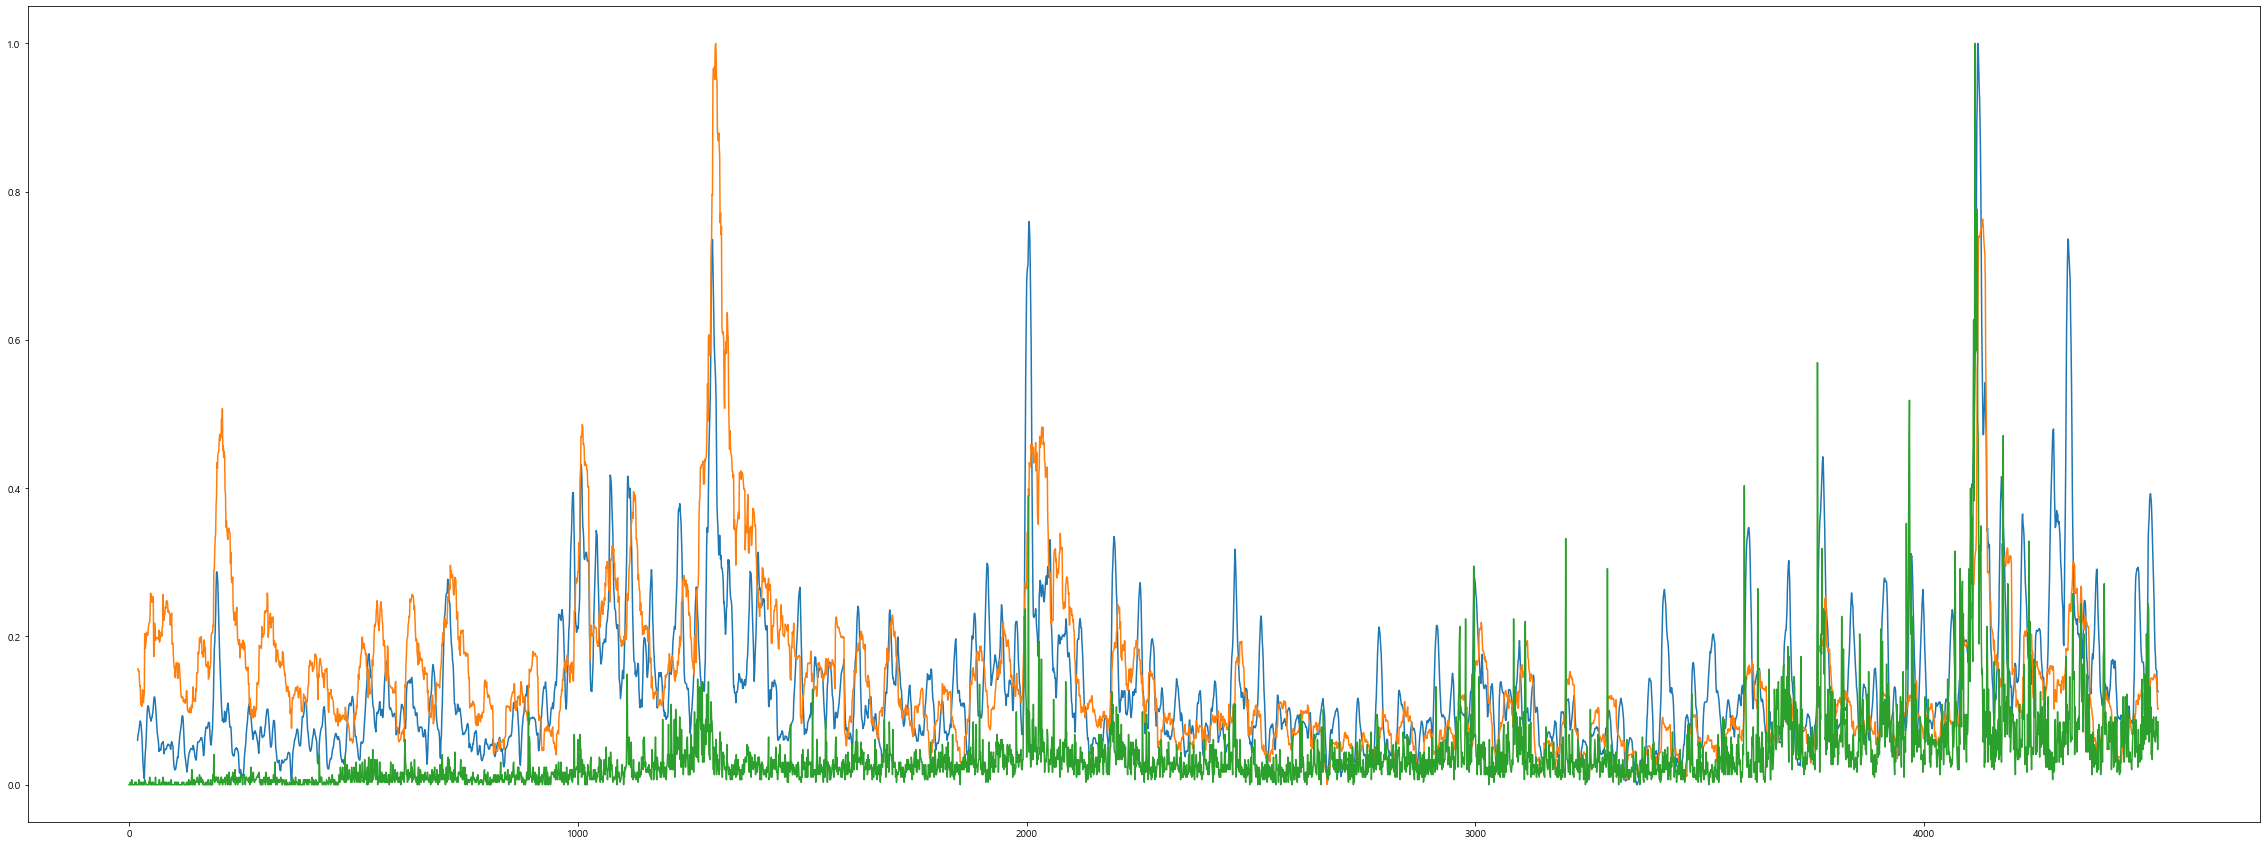

In [95]:
word =          'sum_word'
plt.figure(figsize=(40, 15))
kospi['std'].plot()
kospi['vol'].plot()
kospi[word].plot(); plt.show()

In [96]:
kospi_1 = kospi[["vol","std","sum_word"]]
kospi_1.corr().sort_values(["vol"], ascending=False)

,vol,std,sum_word
vol,1.000000,0.585404,0.152689
std,0.585404,1.000000,0.437038
sum_word,0.152689,0.437038,1.000000


In [12]:
#std top10

# 	vol	        std	        sum_word
# vol	1.000000	0.585404	0.174573
# std	0.585404	1.000000	0.466869
# sum_word 0.174573	0.466869	1.000000


#top10조합  ->수치상으로는 가장 좋음 하지만 오래된 내용(초기연도, ex:2008년)에 대한 시각화가 잘 안됨
    
#     vol	        std	        sum_word
# vol	1.000000	0.585404	0.212048
# std	0.585404	1.000000	0.474385
# sum_word 0.212048	0.474385	1.000000


# 2008,2020에 중점적으로 영향을 주는 단어 위주 -> 수치는 두드러지지만 변동성이 중간인 지점에서 단어의 상관도가 높아지는 부분 존재

# 	vol	        std	        sum_word
# vol	1.000000	0.585404	0.085378
# std	0.585404	1.000000	0.254808
# sum_word 0.085378	0.254808	1.000000


# 종합2 워딩

# 	vol	        std	        sum_word
# vol	1.000000	0.585404	0.165563
# std	0.585404	1.000000	0.379321
# sum_word 0.165563	0.379321	1.000000


#최종선정
# kospi[['구제','금융위기','과대','관심','긴급','변동','위기','인플레','패닉','폭락','추락','탈환','호전','반등','급등','폭등','동학','부양','폭락','급락','상회']].mean(axis=1)
# 	vol	        std	        sum_word
# vol	1.000000	0.585404	0.152689
# std	0.585404	1.000000	0.437038
# sum_word 0.152689	0.437038	1.000000


* nasdaq

In [13]:
nasdaq.head()

,Date,Close,Open,High,Low,Volume,Change,vol,std,date,index,page,패스,피해,외인,수혜,불가피,상향,고지,부양책,감리,우려,긴급,셧다운,신호,공개,팬데믹,확진,등록,모집,팔자,워스트,대체,사상,탈출,가능,메타,달성,경신,어닝,위험,탈환,경색,안정,모멘텀,추진,남북,순이익,매각,충격,리비아,최고점,사드,초대형,횡보,공략,강세,인기,촉각,관건,수급,타결,이벤트,이탈,과세,상승세,감산,구제,과잉,고용,우수,맥스,백신,상환,당선,동양종금,실망,완화,원전,협력,접종,방어,베팅,마이너스,변동성,폭탄,치료,공매도,매입,제한,긍정,제자리,부각,상승,사기,부채,협상,상회,근접,분쟁,여파,민감,선호,개장,신청,상보,급등,가소,파월,악재,상한,대출,후퇴,발동,개시,알리바바,지지,발전,긴축,대지진,최악,안전,화이자,유동성,임박,와락,투자자,반락,약화,가치,승인,확정,발굴,추락,현금,뒷걸음,가능성,위기,지속,인하,기념,매수,실패,안도,급락,부담,단독,돌파,하향,개발,대비,그리스,도달,러브콜,헝다,친환경,둔화,불황,불확실,오름,폭발,반전,고조,개선,부양,흐름,외국인,호재,주의,카드,도약,손실,협약,결합,공모,반발,금리인하,역대,보유,적자,개편,수요,취임,심리,주춤,출시,외국,급증,원대,긴장,부족,북핵,부진,대안,역배,등락,통화,활발,서브프라임,거품,깜짝,유로존,투자,보합,반등,과열,이슈,환매,진출,강등,배당,출발,대상,최고,그린,공시,발목,심사,우투,하락,안심,이익,불안,중단,낙관,바이,개최,북한,위안,대박,침체,랠리,코로나,낙폭,폭등,소송,금지,훈풍,최저,대우조선,유상증자,공세,소비,폐렴,신용등급,눈앞,급감,해소,시그널,김정일,제외,리먼,감전,분할,출범,선도,개편안,성공,대표,화제,지연,인플레,리스크,합의,통과,일시,쇼크,소재,디디,성장,증가,우한,활성화,원화,능가,편입,여전,이하,관망,교체,위협,사고,가입,희망,유효,강화,보장,법인세,개막,오른,미사일,블루칩,도입,돈나무,매도,팔인,고공,저가,미래,문제,세미,통합,시트,호조,이상인상,통화정책,총선,기대,눈길,갈등,목표,흥행,폭락,증세,혁산,회복,독점,변화,리더,귀환,열풍,머스크,양호,대주,쌍끌이,도전,압력,메르스,게임스탑,선방,변수,최대,선거,유망,사태,육박,가시,만기일,제재,혜택,부실,유지,골든,정상화,배열,사자,호전,서학,플러스,대규모,절하,정상,손보,규제,유행,검토,개혁,실전,줄줄이,조정,주의보,인플레이션,엎치락뒤치락,붕괴,마지막,활짝,과대,확대,발표,수익,위축,일부,일제,확보,실업,논란,패닉,안착,대선,양적완화,동학,흑자,간다,재개,진정,버블,구조조정,라임,관심,대형주,동결,블루,약세,가계부채,선택,주시,금융위기,델타,바닥,변동,눈치,연금,우위,확산,감소,폭풍,만기,불구,고수,매력,정체,주목,계약,대장,껑충,브렉,매출,공포,차익,경고,경협,디폴트,테이퍼링,희비,리치,세력,천스닥,루머,날개,출구,예측,악화,사망,의전,레버리지,유입
0,2003-01-02,10.25,10.01,10.45,10.01,3200.0,0.0250,NaN,NaN,2003-01-02,102294,18263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2003-01-03,10.25,10.26,10.26,10.25,600.0,0.0000,NaN,NaN,2003-01-03,125136,21500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [15]:
nasdaq_std_top10=['코로나','매도','외국인','상승','매수','외국','출발','흐름','강세','개장']# 0.433188 ~ 0.358478
nasdaq_vol_top10=['화제','투자자','구제','경색','동양종금','금융위기','블루칩','발동','반전','바닥']# 0.244105~0.061818

In [16]:
# nasdaq_new = nasdaq.drop(columns=["Date","Close","Open","High","Low","Volume","Change","date","index","page"])
# nasdaq_new.dropna(inplace=True)
# nasdaq_new.corr().sort_values(["vol"], ascending=False)

In [23]:
nasdaq["sum_word"] = nasdaq[['화제','투자자','구제','경색','동양종금','금융위기','블루칩','발동','반전','바닥']].sum(axis=1)

In [24]:
#스케일링

from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

nasdaq[['vol', 'std', 'sum_word']] = mm.fit_transform(nasdaq[['vol', 'std', 'sum_word']])

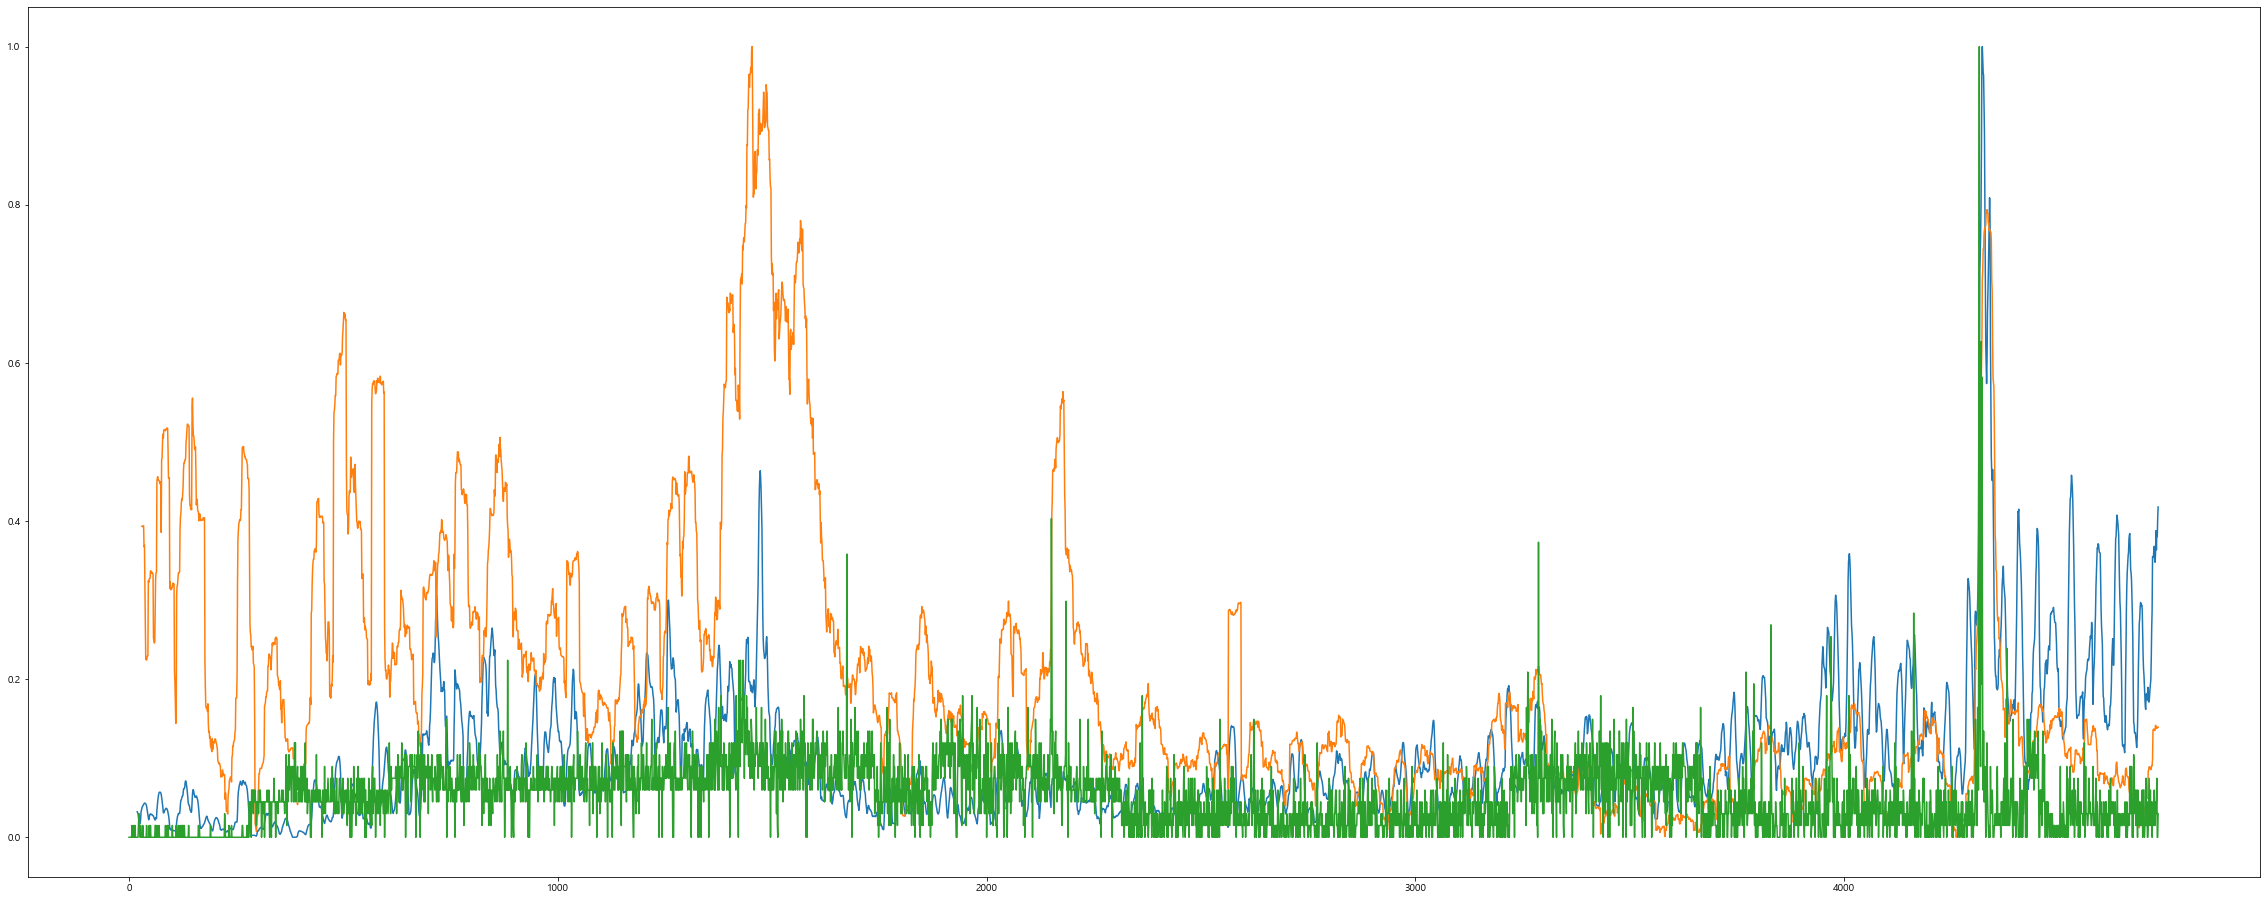

In [25]:
word = 'sum_word'

plt.figure(figsize=(40, 16))
nasdaq['std'].plot()
nasdaq['vol'].plot()
nasdaq[word].plot(); plt.show()

In [ ]:
word = '폭락'

plt.figure(figsize=(40, 16))
sp500['std'].plot()
sp500['vol'].plot()
sp500[word].plot(); plt.show()

## 상관관계 보기위한 바차트

In [ ]:
import seaborn as sns

f,ax=plt.subplots(2,4,figsize=(30,8))
for i, col in enumerate(date_dtm) :
    c = i%4
    r = i//4
    sns.countplot(col,data=date_dtm, ax=ax[r,c])

## 타겟별 상관관계

In [ ]:
# 상관관계 상위 컬럼만 히트맵
def my_check_corr(date_dtm, cond = 0.3):
    for i, idx in enumerate(date_dtm.corr().index):
        for j, col in enumerate(date_dtm.corr().columns):
            if (i<=j) & ( np.abs(date_dtm[idx].corr(date_dtm[col])) > cond) & (idx != col):
                print(f"{idx} \t {col} \t {date_dtm[idx].corr(date_dtm[col]):.2f}")
my_check_corr(date_dtm)


index 	 패스 	 0.32
index 	 외인 	 0.31
index 	 상향 	 0.32
index 	 우려 	 0.47
index 	 팔자 	 0.38
index 	 가능 	 0.45
index 	 경신 	 0.73
index 	 위험 	 0.34
index 	 추진 	 0.31
index 	 강세 	 0.79
index 	 상승세 	 0.69
index 	 맥스 	 0.41
index 	 완화 	 0.30
index 	 상승 	 0.84
index 	 협상 	 0.32
index 	 상회 	 0.54
index 	 분쟁 	 0.32
index 	 개장 	 0.66
index 	 신청 	 0.58
index 	 급등 	 0.44
index 	 상한 	 0.69
index 	 후퇴 	 0.33
index 	 가치 	 0.59
index 	 가능성 	 0.40
index 	 지속 	 0.54
index 	 매수 	 0.85
index 	 급락 	 0.36
index 	 돌파 	 0.37
index 	 하향 	 0.31
index 	 개발 	 0.41
index 	 대비 	 0.46
index 	 도달 	 0.68
index 	 불확실 	 0.30
index 	 개선 	 0.39
index 	 흐름 	 0.67
index 	 외국인 	 0.87
index 	 역대 	 0.33
index 	 수요 	 0.36
index 	 외국 	 0.85
index 	 급증 	 0.36
index 	 부진 	 0.33
index 	 역배 	 0.32
index 	 투자 	 0.69
index 	 보합 	 0.44
index 	 반등 	 0.45
index 	 이슈 	 0.35
index 	 출발 	 0.83
index 	 하락 	 0.69
index 	 이익 	 0.36
index 	 불안 	 0.31
index 	 바이 	 0.64
index 	 개최 	 0.35
index 	 위안 	 0.40
index 	 코로나 	 0.47
index 	 시그널 	 0.44
inde

## Heatmap

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))     
sns.heatmap(dtm.corr(), annot=True, fmt=".4f", cmap="Blues")

In [ ]:
#### Class에 영향을 주는 상위 n개 피쳐에 대해서만 상관 분석
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

top_corr_large  = date_dtm.corr().nlargest(5, 'Class').index
print("Class 피쳐와 (+) 상관관계 TOP-n", top_corr_large)
sns.heatmap(df[top_corr_large].corr(), annot=True, cmap='Reds', fmt='0.2f' , ax=ax1)

top_corr_small = df.corr().nsmallest(5, 'Class').index
print("Class 피쳐와 (-) 상관관계 TOP-n", top_corr_small)
sns.heatmap(df[['Class','V17', 'V14', 'V12', 'V10', 'V16']].corr(), annot=True, cmap='Blues', fmt='0.2f' , ax=ax2)
# plt.show()

In [ ]:
kospi_new = kospi.drop(columns=["Date","Close","Open","High","Low","Volume","Change","date","index","page"])
kospi_new.dropna(inplace=True)

In [ ]:
kospi_new.dropna(inplace=True)

In [ ]:
kospi_new.head()

In [ ]:
# kospi_std_top10=['코로나','급등','반등','부양책','동학','부양','폭등','폭락','급락','상회']# 0.327431~0.224120
# kospi_vol_top10=['화제','골든','코로나','투자자','역배','경색','위기','동학','급등','폭등']# 0.196309~0.107423

# kospi_std_neg10=['카드','가소','공시','와락','의전','가시','손보','우투','구조조정','개혁']#-0.153358 ~ -0.056746
# kospi_vol_neg10=['신청','카드','출시','개최','출발','가시','최고','부진','매각','공시']#-0.300808 ~ -0.170614

In [ ]:
# kospi_new.corr().sort_values(["vol"], ascending=False)

In [ ]:
# kospi_vol = kospi_new[["vol","std"]]

In [ ]:
# kospi_vol.head()

In [ ]:
# kospi50 = kospi_new.iloc[:, 2:50]
# kospi100 = kospi_new.iloc[:, 50:100]
# kospi150 = kospi_new.iloc[:, 100:150]
# kospi200 = kospi_new.iloc[:, 150:200]
# kospi250 = kospi_new.iloc[:, 200:250]
# kospi300 = kospi_new.iloc[:, 250:300]
# kospi350 = kospi_new.iloc[:, 300:350]
# kospi400 = kospi_new.iloc[:, 350:400]
# kospi450 = kospi_new.iloc[:, 400:]

In [ ]:
# kospi50 = pd.concat([kospi_vol, kospi50], axis=1)
# kospi100 = pd.concat([kospi_vol, kospi100], axis=1)
# kospi150 = pd.concat([kospi_vol, kospi150], axis=1)
# kospi200 = pd.concat([kospi_vol, kospi200], axis=1)
# kospi250 = pd.concat([kospi_vol, kospi250], axis=1)
# kospi300 = pd.concat([kospi_vol, kospi300], axis=1)
# kospi350 = pd.concat([kospi_vol, kospi350], axis=1)
# kospi400 = pd.concat([kospi_vol, kospi400], axis=1)
# kospi450 = pd.concat([kospi_vol, kospi450], axis=1)

In [ ]:
# kospi50.corr().sort_values(["vol","std"], ascending=False)

In [ ]:
# fig, ax = plt.subplots(figsize=(30,30))     
# sns.heatmap(kospi50.corr(), annot=True, fmt=".3f", cmap="Blues")